# MEDIDAS COM VNA

In [1]:
#Header notebook
data_exp={
    "Responsible":"Daniel G. Benvenutti",
    "setup":"VNA on the Cavity",
    "sample":"Q4_TII",
}

## SETUP

### Import drivers

 All drivers are in the folder instruments

In [2]:
# drivers de controle dos instrumentos
from instruments.E5063A_driver import *  # VNA
from instruments.Agilent11713C_driver import *  # attenuator
from instruments.E8257D_driver import *  # RF source

### Other auxiliary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from time import sleep
from IPython.display import clear_output
from datetime import datetime
from tqdm.notebook import tqdm

### Configures the other instruments

In [4]:
inst_att = Agilent11713C_driver("TCPIP0::169.254.101.101::inst0::INSTR")
# inst_RFsourceMeasurement = E8257D_driver("TCPIP0::169.254.101.103::inst0::INSTR")
inst_RFsourceExcitation = E8257D_driver("TCPIP0::169.254.101.104::inst0::INSTR")
vna = E5063A_driver("TCPIP0::169.254.101.105::inst0::INSTR")

In [5]:
# A fonte de excitação recebe o canal 3 - marker 1 -  normal
inst_RFsourceExcitation.set_pulse_trigger_external()
inst_RFsourceExcitation.setPulsePolarityNormal()
inst_RFsourceExcitation.start_mod()

# A fonte de excitação não é necessariamente usada no processo de medida da cavidade (a menos que se queira ver os deslocamento dispersivo de frequência)
# no caso sua amplitude é por volta de 11 dBm
inst_RFsourceExcitation.set_amplitude(11)

# Turn off RF

In [72]:
inst_RFsourceExcitation.stop_rf()

## PUNCHOUT

In [7]:
inst_att.set_attenuation(50)

In [17]:
start = 7.116 * 1e9
stop = 7.166 * 1e9
f_c = (stop + start) / 2
span_f = stop - start
n_pontos = 500
if_bandwidth = 1500
sleepp = 30


vna.power = 0
vna.data_array_format = "MLOG"
vna.clear_averaging()

vna.average_points = 356
vna.averaging = 1
# NA.set_amplitude(power)

vna.center_frequency = f_c
vna.span_frequency = span_f
vna.if_bandwidth_frequency = if_bandwidth
vna.sweep_points = n_pontos
vna.autoscale(0)

vna.power = 1

sleep(sleepp)

In [ ]:
mags = np.array([])

clear_output(wait=True)
# Esse comando muda a atenuação do switch
# att.attenuation = 10

# Reseta as medidas
# NA.clear_averaging()
# time.sleep(15) #800

# Esse comando captura os dados do VNA e formata em array numpy de floats
str_data = vna.data_array()
data = np.array(str_data.split(","), "float")
str_freqs = vna.frequency_array()
Freq = np.array(str_freqs.split(","), "float")
mags = np.append(mags, data[0::2])

#matplotlib
#plt.plot(Freq, mags.T)
#plt.xlabel("Frequency (Hz)")
#plt.ylabel("Magnitude (dBm)")
#plt.title("Punchout")
#plt.pause(0.05)
#plt.show()
#plotly
px.line(x=Freq,y=mags.T,width=600,height=600,title="Punchout" labels=dict(x="Frequency cavity (Hz)", y="Magnitude (dBm)")).show()

print("magmin freq=", Freq[np.argmin(mags.T)])

magmin freq= 7443269000.0


In [ ]:
mags0 = mags.copy() #10dB

In [ ]:
mags1 = mags.copy() #50dB

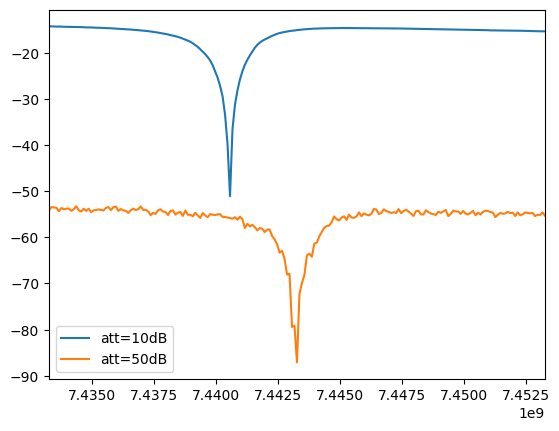

magmin att=10dB freq= 7440569000.0
magmin att=50dB freq= 7443269000.0


In [28]:
plt.plot(Freq, mags0.T, label="att=10dB")
plt.plot(Freq, mags1.T, label="att=50dB")
plt.xlim(Freq[0],Freq[-1])
plt.legend()
plt.show()
go.Figure()
print("magmin att=10dB freq=", Freq[np.argmin(mags0.T)])
print("magmin att=50dB freq=", Freq[np.argmin(mags1.T)])


## PowerSweep

In [ ]:
# EXPERIMENT PARAMETERS

parameters = {
    "name": "VNA_PowerSweep",
    "if_bandwidth": 2000,
    "Freq": np.linspace(7435500,7447500, 120) *1e3, #Hz
    "Att": np.arange(10, 60, 1), #dB
    "vna_avg_points": 356,
    "vna_averaging": 1,
}
#adds data_exp to the parameters dict
parameters={**data_exp,**parameters}
parameters

{'Responsible': 'Daniel G. Benvenutti',
 'setup': 'VNA on the Cavity',
 'sample': 'Q4_TII',
 'name': 'PowerSweep',
 'if_bandwidth': 2000,
 'Freq': array([7.43550000e+09, 7.43560084e+09, 7.43570168e+09, 7.43580252e+09,
        7.43590336e+09, 7.43600420e+09, 7.43610504e+09, 7.43620588e+09,
        7.43630672e+09, 7.43640756e+09, 7.43650840e+09, 7.43660924e+09,
        7.43671008e+09, 7.43681092e+09, 7.43691176e+09, 7.43701261e+09,
        7.43711345e+09, 7.43721429e+09, 7.43731513e+09, 7.43741597e+09,
        7.43751681e+09, 7.43761765e+09, 7.43771849e+09, 7.43781933e+09,
        7.43792017e+09, 7.43802101e+09, 7.43812185e+09, 7.43822269e+09,
        7.43832353e+09, 7.43842437e+09, 7.43852521e+09, 7.43862605e+09,
        7.43872689e+09, 7.43882773e+09, 7.43892857e+09, 7.43902941e+09,
        7.43913025e+09, 7.43923109e+09, 7.43933193e+09, 7.43943277e+09,
        7.43953361e+09, 7.43963445e+09, 7.43973529e+09, 7.43983613e+09,
        7.43993697e+09, 7.44003782e+09, 7.44013866e+09, 7.4402

In [41]:
start = parameters["Freq"][0]
stop = parameters["Freq"][-1]
n_freqs = len(parameters["Freq"])
if_bandwidth = parameters["if_bandwidth"]

f_c = (stop + start) / 2
span_f = stop - start

Freq = parameters["Freq"]
Att = parameters["Att"]


vna.power = 0
vna.data_array_format = "MLOG"
vna.clear_averaging()

vna.average_points = parameters["vna_avg_points"]
vna.averaging = parameters["vna_averaging"]
# NA.set_amplitude(power)

vna.center_frequency = f_c
vna.span_frequency = span_f
vna.if_bandwidth_frequency = if_bandwidth
vna.sweep_points = n_freqs
vna.autoscale(1)

vna.power = 1

# queries vna until it's not busy
vna.query("*OPC?")

'+1\n'

#### Tempo para o VNA terminar as medias (sweeptime*n_medias)
Usar como referência para ajustar o sleep time do loop

In [42]:
sweep_time = vna.sweep_time
avg_points = vna.average_points
avging_time = avg_points * sweep_time
print(
    "sweeptime=",
    sweep_time,
    "s \navg_points=",
    avg_points,
    "\nVNA total averaging sleep time=",
    avging_time,
    "s",
)

sweeptime= 0.117166590964 s 
avg_points= 356 
VNA total averaging sleep time= 41.711306383184 s


In [ ]:
# Obtém a data e hora atuais
start = datetime.now()
name_template= f"{parameters['name']}_{data_exp['sample']}__%Y_%m_%d__%H_%M_%S"
name = start.strftime(name_template)

howtoplot = (
    "\
    data = np.load('"
    + name
    + ".npz')\n\
    attenuations = data['Att']\n\
    freqs = data['Freq']\n\
    mags = data['Mag']\n\
    phases = data['Phase']"
)

Mag = np.full((len(Att), len(Freq)),np.nan)  # [[] for _ in range(len(freqs))]
Phase = np.full((len(Att), len(Freq)),np.nan)  # [[] for _ in range(len(freqs))]

#progress bar
pbar=tqdm(total=len(Att))
# Loop de Medidas
for j, att in enumerate(Att):
    inst_att.set_attenuation(att)
    inst_att.query('*OPC?')
    vna.clear_averaging()

    # queries vna and attenuator until theyre not busy
    # avging_time=vna.average_points*vna.sweep_time()
    # vna.query('*OPC?')
    
    # print(avging_time)
    sleep(avging_time) # tempo para VNA fazer varias medias
    #sleep(30)

    # Limpa o gráfico atual
    # plt.gcf().clear()
    clear_output(wait=True)

    # Esse comando captura os dados do NA e formata em array numpy de floats
    str_data = vna.data_array()
    data = np.array(str_data.split(","), "float")

    # mags = data[0::2]
    mags = data[::2]  # slices vector in 2 by 2 steps

    Mag[j][:] = mags
    print(name)
    pbar.update(1)
    display(pbar.container)

    #matplotlib
    #plt.xlabel("Frequency (Hz)")
    #plt.ylabel("Attenuation (dB)")
    #plt.title(name)
    #plt.pcolor(Freq, Att, Mag)
    #plt.pause(0.05)
    # plt.show()
    
    #plotly
    px.imshow(Mag,
        x=Freq/1e9,
        y=Att,
        aspect="auto",
        width=600,
        height=500,
        origin='lower',
        title="Power sweep",
        labels=dict(
            x="Frequency (GHz)",
            y="Attenuation (dB)"
        )
    ).show()

    
    end=datetime.now()
    np.savez(name, header=howtoplot,  Mag=Mag, Phase=Phase,start=start.isoformat(),end=end.isoformat(),**parameters)
    



PowerSweep_Q4_TII__2024_11_19__13_45_17


100%|##########| 50/50 [34:49<00:00, 41.78s/it]

## TWOTONE

### Unique excitation amplitude

Tempo para o VNA terminar as medias (sweeptime*n_medias)

In [18]:
sweep_time=vna.sweep_time
avg_points=vna.average_points
avging_time =  avg_points* sweep_time
print("sweeptime=",sweep_time,"s \navg_points=",avg_points,"\nVNA total averaging sleep time=", avging_time,"s")

sweeptime= 0.0029002 s 
avg_points= 256 
VNA total averaging sleep time= 0.7424512 s


In [86]:
#EXPERIMENT PARAMETERS
parameters={
    "name":"VNA_TWOTONE_SWEEP",
   "attenuation":50, 
   "excitation_amp":20,
   "Freq":np.arange(3620, 3660, 0.5) * 1e6,#Hz
}

#adds data_exp to the parameters dict
parameters={**data_exp,**parameters}
parameters

{'Responsible': 'Daniel G. Benvenutti',
 'setup': 'VNA on the Cavity',
 'sample': 'Q4_TII',
 'name': 'VNA_TWOTONE_SWEEP',
 'attenuation': 50,
 'excitation_amp': 20,
 'Freq': array([3.6200e+09, 3.6205e+09, 3.6210e+09, 3.6215e+09, 3.6220e+09,
        3.6225e+09, 3.6230e+09, 3.6235e+09, 3.6240e+09, 3.6245e+09,
        3.6250e+09, 3.6255e+09, 3.6260e+09, 3.6265e+09, 3.6270e+09,
        3.6275e+09, 3.6280e+09, 3.6285e+09, 3.6290e+09, 3.6295e+09,
        3.6300e+09, 3.6305e+09, 3.6310e+09, 3.6315e+09, 3.6320e+09,
        3.6325e+09, 3.6330e+09, 3.6335e+09, 3.6340e+09, 3.6345e+09,
        3.6350e+09, 3.6355e+09, 3.6360e+09, 3.6365e+09, 3.6370e+09,
        3.6375e+09, 3.6380e+09, 3.6385e+09, 3.6390e+09, 3.6395e+09,
        3.6400e+09, 3.6405e+09, 3.6410e+09, 3.6415e+09, 3.6420e+09,
        3.6425e+09, 3.6430e+09, 3.6435e+09, 3.6440e+09, 3.6445e+09,
        3.6450e+09, 3.6455e+09, 3.6460e+09, 3.6465e+09, 3.6470e+09,
        3.6475e+09, 3.6480e+09, 3.6485e+09, 3.6490e+09, 3.6495e+09,
        3.6

In [87]:
Freq = parameters["Freq"]
# Obtém a data e hora atuais
start = datetime.now()
name_template = f"{parameters['name']}_{data_exp['sample']}__%Y_%m_%d__%H_%M_%S"
name = start.strftime(name_template)
print(name)
howtoplot = (
    "\
    data = np.load('"
    + name
    + ".npz')\n\
    attenuations = data['Att']\n\
    freqs = data['Freq']\n\
    mags = data['Mag']\n\
    phases = data['Phase']"
)

inst_att.set_attenuation(parameters["attenuation"])
inst_RFsourceExcitation.set_amplitude(parameters["excitation_amp"])
inst_RFsourceExcitation.start_rf()


# cria vetores preechidos com Not A Number ("vazio")
Mag = np.full(len(Freq),np.nan)  # 
Phase = np.full(len(Freq),np.nan)  # 



str_data = vna.data_array()


vna.data_array_format = "PLOG"

#progress bar
pbar=tqdm(total=len(Freq))
# Loop de Medidas
for i, freq in enumerate(Freq):
    clear_output(wait=True)

    inst_RFsourceExcitation.set_frequency(freq)
    vna.clear_averaging()
    
    # queries vna and RF source until theyre not busy
    # vna.query('*OPC?')
    inst_RFsourceExcitation.query("*OPC?")
    sleep(avging_time)  # mais que suficiente pq tem só 3 pontos

    str_data = vna.data_array()
    data = np.array(str_data.split(","), "float")

    mag = np.mean(data[::2])  # média dos 3 pontos setados no VNA
    phase = data[1::2][int(len(data[::2]) / 2)]

    Mag[i] = mag
    Phase[i] = phase

    # Limpa o gráfico atual

    clear_output(wait=True)
    print(name)
    pbar.update(1)
    display(pbar.container)
#matplotlib
    #plt.xlabel("Frequency (Hz)")
    #plt.ylabel("Magnitude (dBm)")
    #plt.title(name)
    #plt.plot(Freq, Mag, "bo-", linewidth=1, markersize=3)
    #plt.pause(0.05)
    #plt.xlim(Freq[0],Freq[-1])
    
    #plotly
    px.line(
        x=Freq/1e9,
        y=Mag,
        width=600,
        height=600,
        markers=True,
        title="Two Tone Sweep",
        labels=dict(
            x="Qubit Excitation Frequency (GHz)",
            y="Cavity output Magnitude at resonance (dBm)"
        )
    ).show()

    end=datetime.now()
    np.savez(name, header=howtoplot,  Mag=Mag, Phase=Phase,start=start.isoformat(),end=end.isoformat(),**parameters)
inst_RFsourceExcitation.stop_rf()




VNA_TWOTONE_SWEEP_Q4_TII__2024_11_19__17_36_23


100%|##########| 80/80 [01:04<00:00,  1.22it/s]

### Map

In [ ]:
#VNA config optional

# vna.center_frequency = 6.89685e9
# vna.span_frequency = 1000
# vna.if_bandwidth_frequency = 500
# vna.sweep_points = 3
# vna.average_points = 256
# vna.averaging = 1
# vna.power = 1

In [113]:
#EXPERIMENT PARAMETERS
parameters={
    "name":"VNA_TWOTONE_MAP",
   "attenuation":50, 
   "Freq":np.arange(3620, 3990, 1) * 1e6, #Hz
   "Amp":np.arange(5,-10,-3),
}

#adds data_exp to the parameters dict
parameters={**data_exp,**parameters}

parameters

{'Responsible': 'Daniel G. Benvenutti',
 'setup': 'VNA on the Cavity',
 'sample': 'Q4_TII',
 'name': 'VNA_TWOTONE_MAP',
 'attenuation': 50,
 'Freq': array([3.620e+09, 3.621e+09, 3.622e+09, 3.623e+09, 3.624e+09, 3.625e+09,
        3.626e+09, 3.627e+09, 3.628e+09, 3.629e+09, 3.630e+09, 3.631e+09,
        3.632e+09, 3.633e+09, 3.634e+09, 3.635e+09, 3.636e+09, 3.637e+09,
        3.638e+09, 3.639e+09, 3.640e+09, 3.641e+09, 3.642e+09, 3.643e+09,
        3.644e+09, 3.645e+09, 3.646e+09, 3.647e+09, 3.648e+09, 3.649e+09,
        3.650e+09, 3.651e+09, 3.652e+09, 3.653e+09, 3.654e+09, 3.655e+09,
        3.656e+09, 3.657e+09, 3.658e+09, 3.659e+09, 3.660e+09, 3.661e+09,
        3.662e+09, 3.663e+09, 3.664e+09, 3.665e+09, 3.666e+09, 3.667e+09,
        3.668e+09, 3.669e+09, 3.670e+09, 3.671e+09, 3.672e+09, 3.673e+09,
        3.674e+09, 3.675e+09, 3.676e+09, 3.677e+09, 3.678e+09, 3.679e+09,
        3.680e+09, 3.681e+09, 3.682e+09, 3.683e+09, 3.684e+09, 3.685e+09,
        3.686e+09, 3.687e+09, 3.688e+0

In [114]:
sweep_time=vna.sweep_time
avg_points=vna.average_points
avging_time =  avg_points* sweep_time
print("sweeptime=",sweep_time,"s \navg_points=",avg_points,"\nVNA total averaging sleep time=", avging_time,"s")
print("Total measurements:",len(parameters["Freq"])*len(parameters["Amp"])," total time ~",np.round(len(parameters["Freq"])*len(parameters["Amp"])*avging_time/60,1),"min")

sweeptime= 0.0029002 s 
avg_points= 256 
VNA total averaging sleep time= 0.7424512 s
Total measurements: 1850  total time ~ 22.9 min


In [ ]:
Freq = parameters["Freq"]
Amp = parameters["Amp"]

# Obtém a data e hora atuais
start = datetime.now()
name_template = f"{parameters['name']}_{data_exp['sample']}_%Y_%m_%d__%H_%M_%S"
name = start.strftime(name_template)
print(name)
howtoplot = (
    "\
    data = np.load('"
    + name
    + ".npz')\n\
    amplitudes = data['Amp']\n\
    freqs = data['Freq']\n\
    mags = data['Mag']\n\
    phases = data['Phase']"
)


inst_att.set_attenuation(parameters["attenuation"])


# set valores "vazios" (nan=not a number) para plot interativo
Mag = np.full((len(Amp), len(Freq)),np.nan)
Phase = np.full((len(Amp), len(Freq)),np.nan)


str_data = vna.data_array()  # cria um array vazio


inst_RFsourceExcitation.start_rf()
vna.data_array_format = "PLOG"

#progress bar
pbar=tqdm(total=len(Amp)*len(Freq))
# Loop de Medidas
for j, amp in enumerate(Amp):
    inst_RFsourceExcitation.set_amplitude(amp)  # seta a amplitude atual do loop

    for i, freq in enumerate(Freq):
        clear_output(wait=True)  # limpa a saída

        inst_RFsourceExcitation.set_frequency(freq)  # seta a frequência atual do loop
        # queries RF source until its not busy
        inst_RFsourceExcitation.query("*OPC?")
        vna.clear_averaging()  # restarta a média
        
        #sleep(avging_time+0.1)
        sleep(avging_time)  # tempo pra fazer as médias

        str_data = vna.data_array()  # pega os dados
        data = np.array(str_data.split(","), "float")  # separa os dados

        mag = np.mean(data[::2])
        phase = data[1::2][int(len(data[::2]) / 2)]

        Mag[j][i] = mag
        Phase[j][i] = phase

        # Limpa o gráfico atual
        # plt.gcf().clear()
        clear_output(wait=True)
        print(name)
        pbar.update(1)
        display(pbar.container)
        #matplotlib
        #plt.ylabel("Excitation amplitude (dBm)")
        #plt.xlabel("Frequency (Hz)")
        #plt.title(name)
        #plt.pcolor(Freq, Amp, Mag)
        #plt.pause(0.05)
        #plotly
        px.imshow(
            Mag, x=Freq/1e9, y=Amp,
            aspect="auto",origin='lower',
            width=600,height=500,
            title="Two Tone Map",
            labels=dict(
                x="Qubit excitation frequency (GHz)",
                y="Excitation source power (dBm)",
                color="Cavity output power (dBm)"
            )
        ).show()

        end=datetime.now()
        np.savez(name, header=howtoplot,  Mag=Mag, Phase=Phase,start=start.isoformat(),end=end.isoformat(),**parameters)
inst_RFsourceExcitation.stop_rf()


VNA_TWOTONE_MAP_Q4_TII_2024_11_19__18_59_06


100%|##########| 1850/1850 [25:00<00:00,  1.24it/s]

In [108]:
inst_RFsourceExcitation.stop_rf()

In [146]:
data = np.load("VNA_TWOTONE_MAP_Q4_TII_2024_11_19__18_59_06.npz")
#dados["header"]
amplitudes = data['Amp']
freqs = data['Freq']
mags = data['Mag']
phases = data['Phase']
ampind=np.where(amplitudes==-7)[0][0]
print(ampind)
px.line(x=freqs,y=mags[ampind], width=600, 
        height=600,
                title=f"Two Tone Map section ({amplitudes[ampind]} dB)",
        labels=dict(
            x="Qubit Excitation Frequency (GHz)",
            y="Cavity output Magnitude at resonance (dBm)"
        )
        )

4


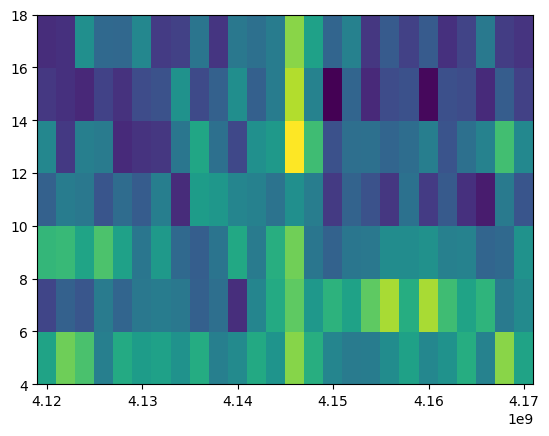

In [87]:
inds=np.where((Freq>=4.12e9) & (Freq<=4.17e9))
inds
plt.pcolor(Freq[inds[0]],Amp,Mag[:,inds[0]])

In [ ]:
inst_RFsourceExcitation.stop_rf()
